## 1. Подключение библиотек

In [60]:
# Прямая установка библиотеки pymorphy3, stopwords

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Админ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Админ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Админ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [28]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [30]:
df1 = pd.read_csv("D:\\YupiterData\\habr.csv")
df2 = pd.read_csv("D:\\YupiterData\\ParsedJsons.csv")
df3 = pd.read_csv("D:\\YupiterData\\PDFParsed.csv")
df = pd.concat([df1, df2, df3], ignore_index=True)

In [31]:
df1

Заголовок  \
0   Современная многофакторная аутентификация на п...   
1               Как livenessProbe может убить ваш Pod   
2   Security Week 2515: уязвимости в загрузчике GRUB2   
3             Возвращаем доступ к Аниме за пару минут   
4          Оптимизация бизнес-процессов и ее проблемы   
5                            13 законов разработки ПО   
6                                     Java Digest #23   
7        Kubernetes для всех: поймет даже гуманитарий   
8   Фантастическая стратегия тестирования и места,...   
9   Забытые технологии хостинга: 10 решений, котор...   
10              How to: Установка chromedriver руками   
11  Краткая история архитектурного ПО: от первых о...   
12  Кастомизация Wi-Fi-точек под дизайнерский инте...   
13  Titan OS: как я впервые с ней познакомился и ч...   
14  Топ-10 нейросетей для создания логотипа с нуля...   
15  Как бросить исключение без throws в Java: техн...   
16            Геопространственная обработка признаков   
17      Дайджест ИБ-регулирования. Январь – март 2025   
18  Как превратить стажировку в карьерный трамплин...   
19  Когда фото становится биометрией: разбор закон...   
20                          Плавающие запятые и ящики   
21        Как ИИ упрощает работу системного аналитика   
22  Что используют для учёта ИТ-активов и когда эт...   
23  Народный измеритель ёмкости батареек и аккумул...   
24  Технологии из прошлого: проводной телефон. Раз...   
25  Ведущий разработчик ChatGPT и его новый проект...   
26                      Доработка системы LMS Knomary   
27  Общие подходы к классическому PostgreSQL в Kub...   
28  Как использовать японские подходы в IT. Часть ...   
29  Создание кастомных действий в Битрикс24: ручна...   
30  Обнаружение протечек воды на базе NodeMCU и Wi...   
31           Как управлять памятью в C#: StructLayout   
32  Как понять, что ИБ-компания вам подходит? Семь...   
33  Шифрование NFS: RPC-with-TLS как альтернатива VPN   
34  Скрининг разработчиков при помощи ИИ: как пров...   
35  Сбой с вероятностью один раз в 20 лет: о марто...   
36            Взлеты и падения «безумного» Эрла Мюнца   
37  Nintendo Switch первого поколения не стоит выб...   
38                            Запуск Linux внутри PDF   
39  Ну что, снова испанская барахолка: от роботов-...   
40  Обслуживаем «необслуживаемое»: автомобильный а...   
41  Анатомия падения: что произошло с первым IPO B...   
42  Личный ИИ-ассистент на ваших данных. Часть 1: ...   
43                    Великие умы ИТ-мира. Билл Гейтс   
44  Киберпанк, драконы, пасхалки и взрыв эмоций. К...   
45                       Старый новый мир аудиокассет   
46  Где заканчивается наука и начинается маркетинг...   
47  Жизнь после отвала eMMC: Загружаем Android с M...   
48  Я больше не доверяю Google Search, но каковы а...   
49  (Не)кладбище тикетов: воскрешаем бэклог без ша...   
50  Польза и перспективы уроков Unity для детей и ...   
51  Как один разработчик предотвратил крупнейшую к...   
52                                 Знакомимся с SciPy   
53  Зверский интернет: коты, бобры, медведы и проч...   
54  IPsecHub+. Отказоустойчивость и динамическая м...   
55  Конкатенация чисел и делимость на 13 — задачка...   
56  Как я беспроводные наушники починил: что может...   
57  Практика китайского, суши мечты, косплей и пек...   
58  10 перспективных российских стартапов – март 2...   

            Название компании  \
0                    Avanpost   
1                        OTUS   
2   «Лаборатория Касперского»   
3                 Amnezia VPN   
4                        OTUS   
5                   RUVDS.com   
6                      Т-Банк   
7       Лаборатория Числитель   
8                  АО «ГНИВЦ»   
9                   RUVDS.com   
10                    Reksoft   
11              Online patent   
12                    LURE IT   
13                        МТС   
14                     BotHub   
15                       OTUS   
16                   Синимекс   
17               SearchInform

In [32]:
df2

Заголовок               Название компании  \
0           NaN          Cybersport.Metaratings   
1           NaN                 ESforce Holding   
2           NaN                 ESforce Holding   
3           NaN                 ESforce Holding   
4           NaN                 ESforce Holding   
...         ...                             ...   
1107        NaN  Федерация креативных индустрий   
1108        NaN  Федерация креативных индустрий   
1109        NaN  Федерация креативных индустрий   
1110        NaN  Федерация креативных индустрий   
1111        NaN  Федерация креативных индустрий   

                                               Описание  Рейтинг Категория  \
0     Информационный сайт, который ежедневно публику...      NaN       NaN   
1     Одна из крупнейших киберспортивных организаций...      NaN       NaN   
2     Одна из крупнейших киберспортивных организаций...      NaN       NaN   
3     Одна из крупнейших киберспортивных организаций...      NaN       NaN   
4     Одна из крупнейших киберспортивных организаций...      NaN       NaN   
...                                                 ...      ...       ...   
1107  Объединяет ведущие профессиональные организаци...      NaN       NaN   
1108  Объединяет ведущие профессиональные организаци...      NaN       NaN   
1109  Объединяет ведущие профессиональные организаци...      NaN       NaN   
1110  Объединяет ведущие профессиональные организаци...      NaN       NaN   
1111  Объединяет ведущие профессиональные организаци...      NaN       NaN   

                  Дата                                              Текст  
0      8 декабря 09:30  7 декабря состоялась церемония награждения лау...  
1      8 декабря 09:30  7 декабря состоялась церемония награждения лау...  
2        29 июля 13:50  Из совместного исследования издателя компьютер...  
3         9 июля 09:33  По статистике The Esports Observer за I полови...  
4      11 апреля 12:43  Компании SuperData Research и PayPal провели с...  
...                ...                                                ...  
1107   30 января 10:43  Привет, Хабр! Представляю вашему вниманию пере...  
1108   24 апреля 12:37  Источник «Умный человек не делает все ошибки с...  
1109  12 октября 14:09  Привет, Хабр! Сегодня мы решили поделиться с с...  
1110  4 сентября 16:44  Привет! Меня зовут Никита Бокарев, я креативны...  
1111      5 июня 06:21  Компетентностая модель — это попытка создания ...  

[1112 rows x 7 columns]

In [33]:
df3

Заголовок  \
0               Cocoapods, Carthage, SPM: как выбрать   
1   как даже давние игроки видят в нем спасительно...   
2                               Cloud4Y 5 часов назад   
3   Просто для того, чтобы вы знали, откуда может ...   
4   CI/CD, чтобы быстро вникнуть в основы технолог...   
5                                      Другие новости   
6   Подобных примеров, когда ИИ разрабатывает авто...   
7                                              ru_vds   
8   МГУ, талантливые кулибины (и И.Кулибин) из глу...   
9                                            Telegram   
10                   старых персональных компьютеров.   
11             Как создать аппаратный эмулятор CD-ROM   
12                                     Skype Telegram   
13                                       4 часа назад   
14  разработками в этой сфере. Держать руку на пул...   

                  Название компании  \
0                     red_mad_robot   
1        Технократия @technokratiya   
2                           Cloud4Y   
3                           Cloud4Y   
4                       Southbridge   
5                     @AnnieBronson   
6                        Альфа-Банк   
7                         RUVDS.com   
8                              Хабр   
9                @Systems_Education   
10                        RUVDS.com   
11                        RUVDS.com   
12             Андрей Тиунов @TAU15   
13                         getmatch   
14  Tourmaline Core @TourmalineCore   

                                            Описание  Рейтинг  \
0       №1 в разработке цифровых решений для бизнеса   117.94   
1                                        ИТ-Компания     4.40   
2                #1 Корпоративный облачный провайдер    71.07   
3                #1 Корпоративный облачный провайдер    71.07   
4   Обеспечиваем стабильную работу highload-проектов   280.79   
5                        Информационная служба Хабра   145.10   
6          Лучший мобильный банк по версии Markswebb   404.32   
7         VDS/VPS-хостинг. Скидка 15% по коду HABR15  2376.90   
8    Экосистема для развития людей, вовлеченных в IT   353.18   
9                                       Пользователь     0.00   
10        VDS/VPS-хостинг. Скидка 15% по коду HABR15  2394.92   
11        VDS/VPS-хостинг. Скидка 15% по коду HABR15  2394.92   
12                             Team Lead / Tech Lead    14.00   
13      Рассказываем о том, как строить карьеру в IT   414.35   
14                                      Пользователь     2.00   

                          Категория            Дата  \
0                     red_mad_robot   6 часов назад   
1        Технократия @technokratiya             NaN   
2                           Cloud4Y   5 часов назад   
3                           Cloud4Y   5 часов назад   
4                       Southbridge    2 часа назад   
5                     @AnnieBronson  59 минут назад   
6                        Альфа-Банк    2 часа назад   
7                         RUVDS.com    4 часа назад   
8                              Хабр  10 часов назад   
9                @Systems_Education  10 часов назад   
10                        RUVDS.com             NaN   
11                        RUVDS.com             NaN   
12             Андрей Тиунов @TAU15             NaN   
13                         getmatch    4 часа назад   
14  Tourmaline Core @TourmalineCore             NaN   

                                                Текст  
0   FAQ Старший iOS-разработчик Аня Кочешкова расс...  
1   Еще до начала MWC в Барселоне было очевидно, ч...  
2   Автор оригинала: Yashwant Singh Взлом Instagra...  
3   OSINT & Hacking — как работает фишинг для нель...  
4   на примере Gitlab применять ее в работе. В ста...  
5   Митчелл Бейкер, гендиректор Mozilla с 2020 год...  
6   Подписаться В е мы внедрили ИИ-агентов, которы...  
7   Инструменты наблюдаемости, о которых нужно зна...  
8   8 февраля — день российской науки. Этот праздн...  
9   look, use the source

In [34]:
df

Заголовок  \
0     Современная многофакторная аутентификация на п...   
1                 Как livenessProbe может убить ваш Pod   
2     Security Week 2515: уязвимости в загрузчике GRUB2   
3               Возвращаем доступ к Аниме за пару минут   
4            Оптимизация бизнес-процессов и ее проблемы   
...                                                 ...   
1181                   старых персональных компьютеров.   
1182             Как создать аппаратный эмулятор CD-ROM   
1183                                     Skype Telegram   
1184                                       4 часа назад   
1185  разработками в этой сфере. Держать руку на пул...   

                    Название компании  \
0                            Avanpost   
1                                OTUS   
2           «Лаборатория Касперского»   
3                         Amnezia VPN   
4                                OTUS   
...                               ...   
1181                        RUVDS.com   
1182                        RUVDS.com   
1183             Андрей Тиунов @TAU15   
1184                         getmatch   
1185  Tourmaline Core @TourmalineCore   

                                           Описание  Рейтинг  \
0     Безопасность начинается с управления доступом    80.62   
1              Цифровые навыки от ведущих экспертов   506.66   
2       Ловим вирусы, исследуем угрозы, спасаем мир   195.65   
3                      Software for self-hosted VPN     0.00   
4              Цифровые навыки от ведущих экспертов   506.66   
...                                             ...      ...   
1181     VDS/VPS-хостинг. Скидка 15% по коду HABR15  2394.92   
1182     VDS/VPS-хостинг. Скидка 15% по коду HABR15  2394.92   
1183                          Team Lead / Tech Lead    14.00   
1184   Рассказываем о том, как строить карьеру в IT   414.35   
1185                                   Пользователь     2.00   

                                              Категория           Дата  \
0     Программное обеспечение, Информационная безопа...     2025-04-07   
1     Консалтинг и поддержка, Рекрутинг и HR, Произв...     2025-04-07   
2                               Программное обеспечение     2025-04-07   
3                                                   NaN     2025-04-07   
4     Консалтинг и поддержка, Рекрутинг и HR, Произв...     2025-04-07   
...                                                 ...            ...   
1181                                          RUVDS.com            NaN   
1182                                          RUVDS.com            NaN   
1183                               Андрей Тиунов @TAU15            NaN   
1184                                           getmatch   4 часа назад   
1185                    Tourmaline Core @TourmalineCore            NaN   

                                                  Текст  
0     Привет, Хабр! Это Андрей Шпаков, руководитель ...  
1     Привет, Хабр!Если вы хоть раз дебажили под, ко...  
2     На прошлой неделе компания Microsoft отчиталас...  
3     Всем привет! Мы уверены, что среди читателей Х...  
4     В современном деловом мире технологии играют к...  
...                                                 ...  
1181  Несмотря на то, что постепенно оптические диск...  
1182  под Linux* , Ра Несмотря на то, что постепенно...  
1183  Идея А почему бы не использовать возможности c...  
1184  Весь интернет уже готовится к выходу Windows 1...  
1185  возможность взять человека с курсов. Получить ...  

[1186 rows x 7 columns]

### Описание набора данных

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Заголовок          74 non-null     object 
 1   Название компании  1186 non-null   object 
 2   Описание           1186 non-null   object 
 3   Рейтинг            367 non-null    float64
 4   Категория          366 non-null    object 
 5   Дата               1181 non-null   object 
 6   Текст              1186 non-null   object 
dtypes: float64(1), object(6)
memory usage: 65.0+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [36]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [37]:
df['Обработанный текст'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['Текст']]

In [38]:
df.head()

Заголовок  \
0  Современная многофакторная аутентификация на п...   
1              Как livenessProbe может убить ваш Pod   
2  Security Week 2515: уязвимости в загрузчике GRUB2   
3            Возвращаем доступ к Аниме за пару минут   
4         Оптимизация бизнес-процессов и ее проблемы   

           Название компании                                       Описание  \
0                   Avanpost  Безопасность начинается с управления доступом   
1                       OTUS           Цифровые навыки от ведущих экспертов   
2  «Лаборатория Касперского»    Ловим вирусы, исследуем угрозы, спасаем мир   
3                Amnezia VPN                   Software for self-hosted VPN   
4                       OTUS           Цифровые навыки от ведущих экспертов   

   Рейтинг                                          Категория        Дата  \
0    80.62  Программное обеспечение, Информационная безопа...  2025-04-07   
1   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   
2   195.65                            Программное обеспечение  2025-04-07   
3     0.00                                                NaN  2025-04-07   
4   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   

                                               Текст  \
0  Привет, Хабр! Это Андрей Шпаков, руководитель ...   
1  Привет, Хабр!Если вы хоть раз дебажили под, ко...   
2  На прошлой неделе компания Microsoft отчиталас...   
3  Всем привет! Мы уверены, что среди читателей Х...   
4  В современном деловом мире технологии играют к...   

                                  Обработанный текст  
0  привет хабр это андрей шпаков руководитель нап...  
1  привет хабр если вы хоть раз дебажили под кото...  
2  на прошлой неделе компания microsoft отчиталас...  
3  всем привет мы уверены что среди читателей хаб...  
4  в современном деловом мире технологии играют к...

In [39]:
df['Текст'][0]

'Привет, Хабр! Это Андрей Шпаков, руководитель направления многофакторной аутентификации, Компания "Актив" и Дмитрий Грудинин, руководитель развития продуктовой линейки аутентификации Avanpost FAM/MFA+. В этой статье мы расскажем, как работают современные системы управления доступом, и какие преимущества получает организация при использовании системы IAM Avanpost FAM и MFA+ вместе с аутентификаторами Рутокен.Для построения базового сценария внедрения многофакторной аутентификации необходимы:— поддержка современных методов многофакторной аутентификации в целевых прикладных сервисах и ПО, где обрабатывается чувствительная информация;— программные или аппаратные средства для многофакторной аутентификации у пользователя. В случае использования аппаратных устройств их называют аутентификаторами.Компания «Актив» производит три устройства, использующие три основные технологии многофакторной аутентификации:Рутокен ЭЦП 3.0 — универсальный аутентификатор на основе технологии инфраструктуры откры

In [40]:
df['Обработанный текст'][0]

'привет хабр это андрей шпаков руководитель направления многофакторной аутентификации компания актив и дмитрий грудинин руководитель развития продуктовой линейки аутентификации avanpost fam mfa в этой статье мы расскажем как работают современные системы управления доступом и какие преимущества получает организация при использовании системы iam avanpost fam и mfa вместе с аутентификаторами рутокен для построения базового сценария внедрения многофакторной аутентификации необходимы поддержка современных методов многофакторной аутентификации в целевых прикладных сервисах и по где обрабатывается чувствительная информация программные или аппаратные средства для многофакторной аутентификации у пользователя в случае использования аппаратных устройств их называют аутентификаторами компания актив производит три устройства использующие три основные технологии многофакторной аутентификации рутокен эцп универсальный аутентификатор на основе технологии инфраструктуры открытых ключей pki может работа

In [41]:
russian_stopwords = stopwords.words("russian") 

In [42]:
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [43]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 

In [44]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [45]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [46]:
df.head()

Заголовок  \
0  Современная многофакторная аутентификация на п...   
1              Как livenessProbe может убить ваш Pod   
2  Security Week 2515: уязвимости в загрузчике GRUB2   
3            Возвращаем доступ к Аниме за пару минут   
4         Оптимизация бизнес-процессов и ее проблемы   

           Название компании                                       Описание  \
0                   Avanpost  Безопасность начинается с управления доступом   
1                       OTUS           Цифровые навыки от ведущих экспертов   
2  «Лаборатория Касперского»    Ловим вирусы, исследуем угрозы, спасаем мир   
3                Amnezia VPN                   Software for self-hosted VPN   
4                       OTUS           Цифровые навыки от ведущих экспертов   

   Рейтинг                                          Категория        Дата  \
0    80.62  Программное обеспечение, Информационная безопа...  2025-04-07   
1   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   
2   195.65                            Программное обеспечение  2025-04-07   
3     0.00                                                NaN  2025-04-07   
4   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   

                                               Текст  \
0  Привет, Хабр! Это Андрей Шпаков, руководитель ...   
1  Привет, Хабр!Если вы хоть раз дебажили под, ко...   
2  На прошлой неделе компания Microsoft отчиталас...   
3  Всем привет! Мы уверены, что среди читателей Х...   
4  В современном деловом мире технологии играют к...   

                                  Обработанный текст  \
0  привет хабр это андрей шпаков руководитель нап...   
1  привет хабр если вы хоть раз дебажили под кото...   
2  на прошлой неделе компания microsoft отчиталас...   
3  всем привет мы уверены что среди читателей хаб...   
4  в современном деловом мире технологии играют к...   

                              Токенизированный текст  
0  привет хабр андрей шпаков руководитель направл...  
1  привет хабр дебажили вроде работает kubernetes...  
2  прошлой неделе компания microsoft отчиталась о...  
3  привет уверены среди читателей хабра точно най...  
4  современном деловом мире технологии играют клю...

In [47]:
df['Токенизированный текст'][0]

'привет хабр андрей шпаков руководитель направления многофакторной аутентификации компания актив дмитрий грудинин руководитель развития продуктовой линейки аутентификации avanpost fam mfa статье расскажем работают современные системы управления доступом какие преимущества получает организация использовании системы iam avanpost fam mfa вместе аутентификаторами рутокен построения базового сценария внедрения многофакторной аутентификации необходимы поддержка современных методов многофакторной аутентификации целевых прикладных сервисах обрабатывается чувствительная информация программные аппаратные средства многофакторной аутентификации пользователя случае использования аппаратных устройств называют аутентификаторами компания актив производит устройства использующие основные технологии многофакторной аутентификации рутокен эцп универсальный аутентификатор основе технологии инфраструктуры открытых ключей pki работать аутентификатор одновременно являться средством электронной подписи рутокен

In [48]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['Стеммингированный текст'] = stem_list

In [49]:
df.head()

Заголовок  \
0  Современная многофакторная аутентификация на п...   
1              Как livenessProbe может убить ваш Pod   
2  Security Week 2515: уязвимости в загрузчике GRUB2   
3            Возвращаем доступ к Аниме за пару минут   
4         Оптимизация бизнес-процессов и ее проблемы   

           Название компании                                       Описание  \
0                   Avanpost  Безопасность начинается с управления доступом   
1                       OTUS           Цифровые навыки от ведущих экспертов   
2  «Лаборатория Касперского»    Ловим вирусы, исследуем угрозы, спасаем мир   
3                Amnezia VPN                   Software for self-hosted VPN   
4                       OTUS           Цифровые навыки от ведущих экспертов   

   Рейтинг                                          Категория        Дата  \
0    80.62  Программное обеспечение, Информационная безопа...  2025-04-07   
1   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   
2   195.65                            Программное обеспечение  2025-04-07   
3     0.00                                                NaN  2025-04-07   
4   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   

                                               Текст  \
0  Привет, Хабр! Это Андрей Шпаков, руководитель ...   
1  Привет, Хабр!Если вы хоть раз дебажили под, ко...   
2  На прошлой неделе компания Microsoft отчиталас...   
3  Всем привет! Мы уверены, что среди читателей Х...   
4  В современном деловом мире технологии играют к...   

                                  Обработанный текст  \
0  привет хабр это андрей шпаков руководитель нап...   
1  привет хабр если вы хоть раз дебажили под кото...   
2  на прошлой неделе компания microsoft отчиталас...   
3  всем привет мы уверены что среди читателей хаб...   
4  в современном деловом мире технологии играют к...   

                              Токенизированный текст  \
0  привет хабр андрей шпаков руководитель направл...   
1  привет хабр дебажили вроде работает kubernetes...   
2  прошлой неделе компания microsoft отчиталась о...   
3  привет уверены среди читателей хабра точно най...   
4  современном деловом мире технологии играют клю...   

                             Стеммингированный текст  
0  привет хабр андр шпак руководител направлен мн...  
1  привет хабр дебаж врод работа kubernetes все р...  
2  прошл недел компан microsoft отчита обнаружен ...  
3  привет увер сред читател хабр точн найдут люби...  
4  современ делов мир технолог игра ключев рол об...

In [50]:
df['Стеммингированный текст'][0]

'привет хабр андр шпак руководител направлен многофакторн аутентификац компан акт дмитр грудинин руководител развит продуктов линейк аутентификац avanpost fam mfa стат расскаж работа современ систем управлен доступ как преимуществ получа организац использован систем iam avanpost fam mfa вмест аутентификатор руток построен базов сценар внедрен многофакторн аутентификац необходим поддержк современ метод многофакторн аутентификац целев прикладн сервис обрабатыва чувствительн информац программн аппаратн средств многофакторн аутентификац пользовател случа использован аппаратн устройств называ аутентификатор компан акт производ устройств использ основн технолог многофакторн аутентификац руток эцп универсальн аутентификатор основ технолог инфраструктур открыт ключ pki работа аутентификатор одновремен явля средств электрон подпис руток otp аппаратн средств генерац криптографическ вычисля одноразов парол алгоритм totp руток mfa перв отечествен usb ток баз технолог fido технолог mfa позволя полн

In [51]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [52]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лемматизированный текст'] = lemm_texts_list

CPU times: total: 3min 11s
Wall time: 3min 12s


In [53]:
df.head()

Заголовок  \
0  Современная многофакторная аутентификация на п...   
1              Как livenessProbe может убить ваш Pod   
2  Security Week 2515: уязвимости в загрузчике GRUB2   
3            Возвращаем доступ к Аниме за пару минут   
4         Оптимизация бизнес-процессов и ее проблемы   

           Название компании                                       Описание  \
0                   Avanpost  Безопасность начинается с управления доступом   
1                       OTUS           Цифровые навыки от ведущих экспертов   
2  «Лаборатория Касперского»    Ловим вирусы, исследуем угрозы, спасаем мир   
3                Amnezia VPN                   Software for self-hosted VPN   
4                       OTUS           Цифровые навыки от ведущих экспертов   

   Рейтинг                                          Категория        Дата  \
0    80.62  Программное обеспечение, Информационная безопа...  2025-04-07   
1   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   
2   195.65                            Программное обеспечение  2025-04-07   
3     0.00                                                NaN  2025-04-07   
4   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   

                                               Текст  \
0  Привет, Хабр! Это Андрей Шпаков, руководитель ...   
1  Привет, Хабр!Если вы хоть раз дебажили под, ко...   
2  На прошлой неделе компания Microsoft отчиталас...   
3  Всем привет! Мы уверены, что среди читателей Х...   
4  В современном деловом мире технологии играют к...   

                                  Обработанный текст  \
0  привет хабр это андрей шпаков руководитель нап...   
1  привет хабр если вы хоть раз дебажили под кото...   
2  на прошлой неделе компания microsoft отчиталас...   
3  всем привет мы уверены что среди читателей хаб...   
4  в современном деловом мире технологии играют к...   

                              Токенизированный текст  \
0  привет хабр андрей шпаков руководитель направл...   
1  привет хабр дебажили вроде работает kubernetes...   
2  прошлой неделе компания microsoft отчиталась о...   
3  привет уверены среди читателей хабра точно най...   
4  современном деловом мире технологии играют клю...   

                             Стеммингированный текст  \
0  привет хабр андр шпак руководител направлен мн...   
1  привет хабр дебаж врод работа kubernetes все р...   
2  прошл недел компан microsoft отчита обнаружен ...   
3  привет увер сред читател хабр точн найдут люби...   
4  современ делов мир технолог игра ключев рол об...   

                             Лемматизированный текст  
0  привет хабра андрей шпак руководитель направле...  
1  привет хабра дебажить вроде работать kubernete...  
2  прошлый неделя компания microsoft отчитаться о...  
3  привет уверить среди читатель хабра точно найт...  
4  современный деловой мир технология играть ключ...

In [54]:
df['Лемматизированный текст'][0]

'привет хабра андрей шпак руководитель направление многофакторный аутентификация компания актив дмитрий грудинин руководитель развитие продуктовый линейка аутентификация avanpost fam mfa статья рассказать работать современный система управление доступ какой преимущество получать организация использование система iam avanpost fam mfa вместе аутентификатор рутокен построение базовый сценарий внедрение многофакторный аутентификация необходимый поддержка современный метод многофакторный аутентификация целевой прикладной сервис обрабатываться чувствительный информация программный аппаратный средство многофакторный аутентификация пользователь случай использование аппаратный устройство называть аутентификатор компания актив производить устройство использовать основной технология многофакторный аутентификация рутокен эцп универсальный аутентификатор основа технология инфраструктура открытый ключ pki работать аутентификатор одновременно являться средство электронный подпись рутокен otp аппаратн

In [55]:
df['Лемматизированный текст'] = [tokenize(text) for text in df['Лемматизированный текст']]

In [57]:
df.head()

Заголовок  \
0  Современная многофакторная аутентификация на п...   
1              Как livenessProbe может убить ваш Pod   
2  Security Week 2515: уязвимости в загрузчике GRUB2   
3            Возвращаем доступ к Аниме за пару минут   
4         Оптимизация бизнес-процессов и ее проблемы   

           Название компании                                       Описание  \
0                   Avanpost  Безопасность начинается с управления доступом   
1                       OTUS           Цифровые навыки от ведущих экспертов   
2  «Лаборатория Касперского»    Ловим вирусы, исследуем угрозы, спасаем мир   
3                Amnezia VPN                   Software for self-hosted VPN   
4                       OTUS           Цифровые навыки от ведущих экспертов   

   Рейтинг                                          Категория        Дата  \
0    80.62  Программное обеспечение, Информационная безопа...  2025-04-07   
1   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   
2   195.65                            Программное обеспечение  2025-04-07   
3     0.00                                                NaN  2025-04-07   
4   506.66  Консалтинг и поддержка, Рекрутинг и HR, Произв...  2025-04-07   

                                               Текст  \
0  Привет, Хабр! Это Андрей Шпаков, руководитель ...   
1  Привет, Хабр!Если вы хоть раз дебажили под, ко...   
2  На прошлой неделе компания Microsoft отчиталас...   
3  Всем привет! Мы уверены, что среди читателей Х...   
4  В современном деловом мире технологии играют к...   

                                  Обработанный текст  \
0  привет хабр это андрей шпаков руководитель нап...   
1  привет хабр если вы хоть раз дебажили под кото...   
2  на прошлой неделе компания microsoft отчиталас...   
3  всем привет мы уверены что среди читателей хаб...   
4  в современном деловом мире технологии играют к...   

                              Токенизированный текст  \
0  привет хабр андрей шпаков руководитель направл...   
1  привет хабр дебажили вроде работает kubernetes...   
2  прошлой неделе компания microsoft отчиталась о...   
3  привет уверены среди читателей хабра точно най...   
4  современном деловом мире технологии играют клю...   

                             Стеммингированный текст  \
0  привет хабр андр шпак руководител направлен мн...   
1  привет хабр дебаж врод работа kubernetes все р...   
2  прошл недел компан microsoft отчита обнаружен ...   
3  привет увер сред читател хабр точн найдут люби...   
4  современ делов мир технолог игра ключев рол об...   

                             Лемматизированный текст  
0  привет хабра андрей шпак руководитель направле...  
1  привет хабра дебажить вроде работать kubernete...  
2  прошлый неделя компания microsoft отчитаться о...  
3  привет уверить среди читатель хабра точно найт...  
4  современный деловой мир технология играть ключ...

# Облако слов

In [75]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

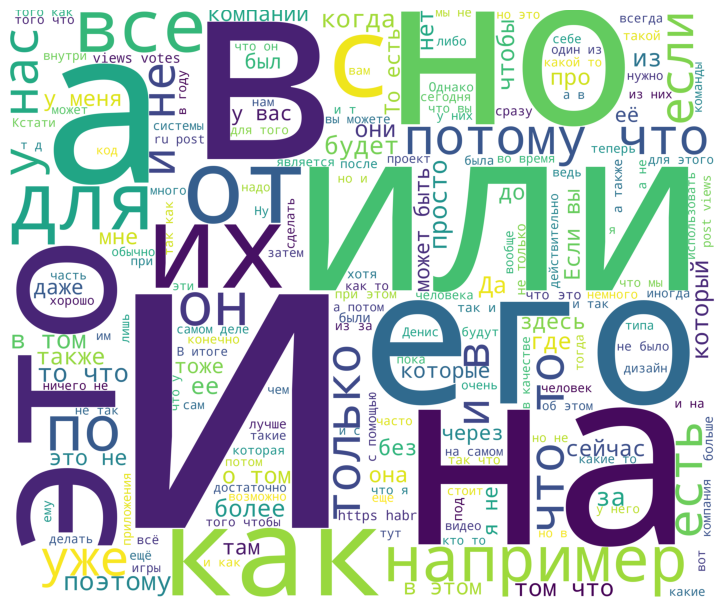

In [89]:
corpus = get_corpus(df['Текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

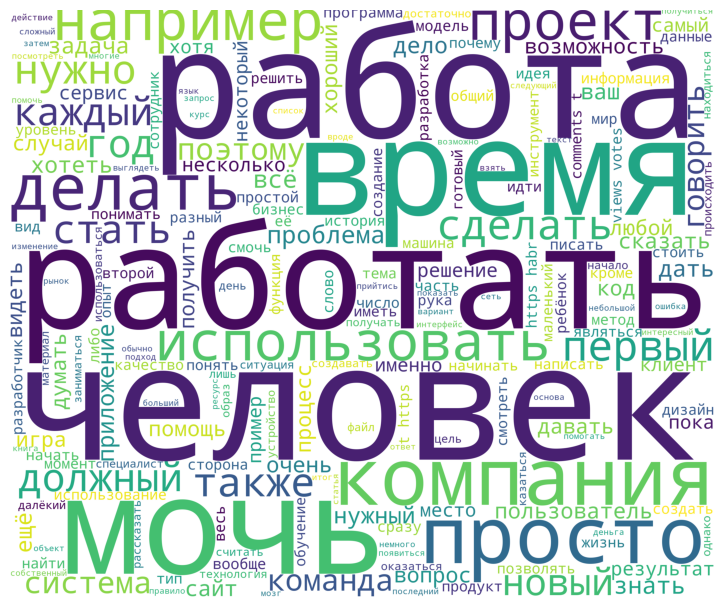

In [90]:
corpus = get_corpus(df['Лемматизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [91]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

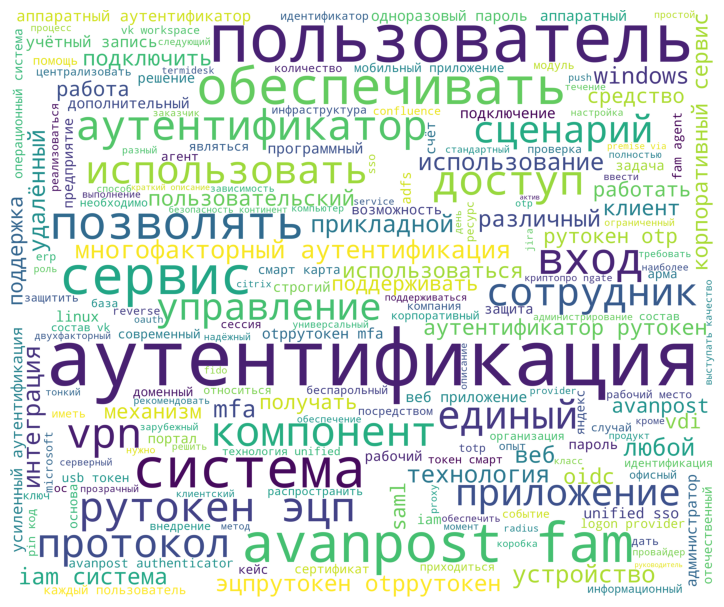

In [92]:
corpus = df['Лемматизированный текст'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

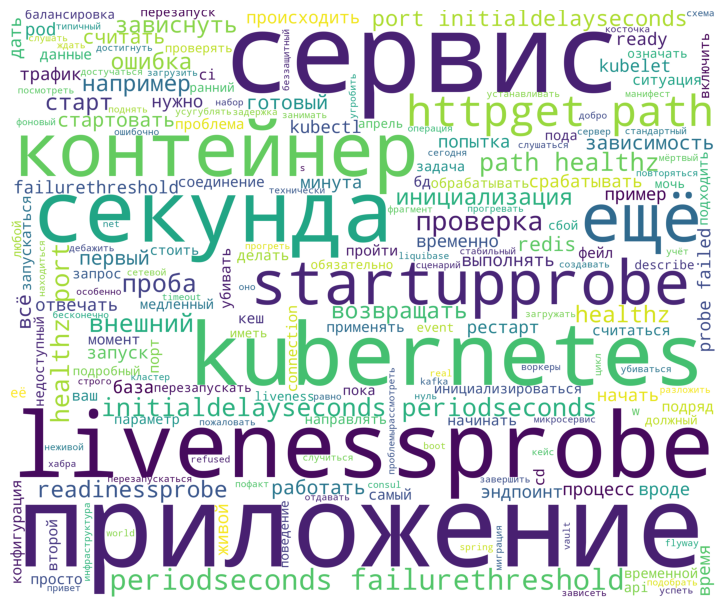

In [93]:
corpus = df['Лемматизированный текст'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [94]:
df['Лемматизированный текст'][1]

'привет хабра дебажить вроде работать kubernetes всё равно убивать добро пожаловать сегодня разложить косточка livenessprobe угробить ваш сервис самый беззащитный момент дать случиться сценарий проблемырассмотреть типичный кейс микросервис например spring boot net запуск выполнять стандартный набор операция применять миграция схема база данные flyway liquibase загружать конфигурация внешний vault consul устанавливать соединение redis kafka s прогревать кеш создавать фоновый воркеры начинать слушать http‑порт отдавать healthz инициализация занимать секунда особенно загрузить ci cd‑кластер прогреть сетевой задержка бд посмотреть фрагмент манифест livenessprobe httpget path healthz port initialdelayseconds periodseconds failurethreshold делать kubelet секунда старт контейнер запускаться первый проверка healthz приложение ещё завершить старт порт слушаться эндпоинт healthz ещё отвечать первый проверка возвращать connection refused timeout считаться ошибка секунда второй попытка ситуация пр

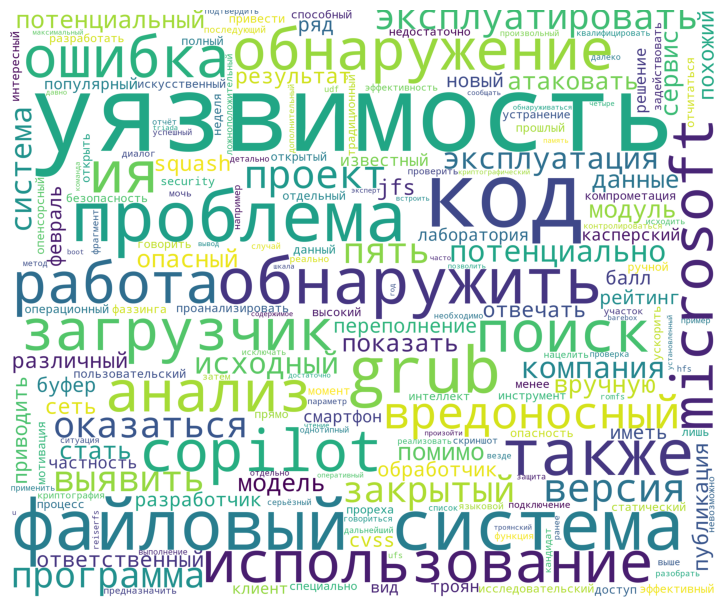

In [95]:
corpus = df['Лемматизированный текст'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [96]:
df['Лемматизированный текст'][2]

'прошлый неделя компания microsoft отчитаться обнаружение уязвимость загрузчик grub открытый исходный код мотивация microsoft проанализировать опенсорсный проект потенциально высокий опасность уязвимость grub эксплуатация привести компрометация операционный система открыть потенциальный атаковать полный доступ пользовательский данные отдельный интересный момент данный исследовательский проект стать использование искусственный интеллект версия microsoft copilot специально разработать устранение прореха безопасность microsoft прямо говорить использование security copilot недостаточно эффективный обнаружение уязвимость сервис лишь способный ускорить процесс поиск проблема исходный код помимо ия проект также задействовать традиционный инструмент статический анализ код фаззинга ручной анализ менее показать эффективность языковой модель обнаружение потенциально опасный участок код затем проверить вручную фрагмент диалог ия показать скриншот выше copilot нацелить поиск ошибка код реально мочь

# Векторизация текстовых данных

Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

1. Прямое кодирование (one-hot encoding) 

Прямое кодирование (one-hot encoding) считается самым простым способом преобразования токенов в тензоры и выполняется следующим образом:

1. каждый токен представляет бинарный вектор (значения 0 или 1);
2. единица ставится тому элементу, который соответствует номеру токена в словаре.

Проблемой прямого кодирования является размерность. 

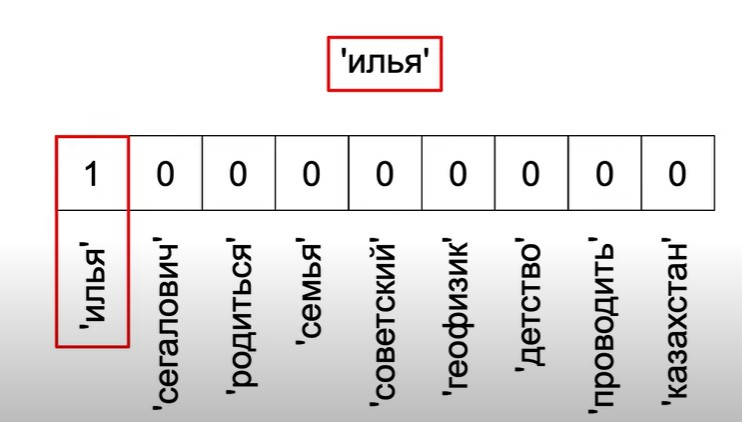

2. Bag of words

В отличие от прямого кодирования, мешок слов (Bag of words) выделяет вектору весь документ, и каждый элемент кодируется 1 по порядку следования слов в словаре.

Bag of words решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз.

__Мешок слов__ - решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. В пакете scikit-learn есть модуль CountVectorizer, который преобразовывает входной текст в матрицу, значениями которой являются количества вхождения данного ключа(слова) в текст. Таким образом, мы получим матрицу, размерность которой будет равна количеству всех слов, умноженных на количество документов. И элементами матрицы будут числа, которые означают, сколько раз всего слово встретилось в тексте.

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
df['Лемматизированный текст'][0]

'привет хабра андрей шпак руководитель направление многофакторный аутентификация компания актив дмитрий грудинин руководитель развитие продуктовый линейка аутентификация avanpost fam mfa статья рассказать работать современный система управление доступ преимущество получать организация использование система iam avanpost fam mfa вместе аутентификатор рутокен построение базовый сценарий внедрение многофакторный аутентификация необходимый поддержка современный метод многофакторный аутентификация целевой прикладной сервис обрабатываться чувствительный информация программный аппаратный средство многофакторный аутентификация пользователь случай использование аппаратный устройство называть аутентификатор компания актив производить устройство использовать основной технология многофакторный аутентификация рутокен эцп универсальный аутентификатор основа технология инфраструктура открытый ключ pki работать аутентификатор одновременно являться средство электронный подпись рутокен otp аппаратный сре

In [99]:
vectorizer = CountVectorizer()
vectorizer.fit(df['Лемматизированный текст'])

CountVectorizer()

In [100]:
print(vectorizer.vocabulary_)

{'привет': 57347, 'хабра': 72259, 'андрей': 23245, 'шпак': 74515, 'руководитель': 62477, 'направление': 46158, 'многофакторный': 44608, 'аутентификация': 23956, 'компания': 39847, 'актив': 22818, 'дмитрий': 32720, 'грудинин': 31077, 'развитие': 60080, 'продуктовый': 58408, 'линейка': 42123, 'avanpost': 1426, 'fam': 6505, 'mfa': 12130, 'статья': 66656, 'рассказать': 60933, 'работать': 59798, 'современный': 65438, 'система': 64295, 'управление': 70611, 'доступ': 33317, 'преимущество': 57091, 'получать': 55510, 'организация': 50452, 'использование': 37714, 'iam': 8931, 'вместе': 27636, 'аутентификатор': 23954, 'рутокен': 62559, 'построение': 56298, 'базовый': 24150, 'сценарий': 67625, 'внедрение': 27666, 'необходимый': 47481, 'поддержка': 54319, 'метод': 43928, 'целевой': 73075, 'прикладной': 57560, 'сервис': 63897, 'обрабатываться': 49182, 'чувствительный': 73921, 'информация': 37486, 'программный': 58291, 'аппаратный': 23493, 'средство': 66418, 'пользователь': 55538, 'случай': 64998, 'у

In [101]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Лемматизированный текст'])

In [102]:
count_matrix.shape

(1186, 267464)

In [103]:
vectorizer.get_feature_names_out()[45000:46000]

array(['выбор товар', 'выбор формат', 'выбор фреймворк', 'выбор хотеть',
       'выбор хотеться', 'выбор хотя', 'выбор цвет', 'выбор цветовой',
       'выбор цветовой палитра', 'выбор человек',
       'выбор человек известно', 'выбор элемент', 'выбор язык',
       'выбор язык программирование', 'выборка', 'выборка данные',
       'выборка действительно', 'выборка действительно важный',
       'выборка затем', 'выборка затем подбирать', 'выборка качественный',
       'выборка например', 'выборка получиться', 'выборка пользователь',
       'выборка содержать', 'выборка твит', 'выборка твит сарказм',
       'выборочно', 'выборочно марсианский',
       'выборочно марсианский мечта', 'выборочный', 'выборы',
       'выбрасывать', 'выбрасываться', 'выбрать', 'выбрать python',
       'выбрать архитектура', 'выбрать важный', 'выбрать вариант',
       'выбрать ваш', 'выбрать вообще', 'выбрать время', 'выбрать всё',
       'выбрать второе', 'выбрать второй', 'выбрать второй вариант',
       'выбр

In [107]:
vectorizer.get_feature_names_out()[23360]

'аутентификация'

In [108]:
vectorizer.get_feature_names_out()[214518]

'система'

In [109]:
print(count_matrix)

  (0, 177215)	1
  (0, 253928)	1
  (0, 21994)	1
  (0, 206881)	2
  (0, 122555)	1
  (0, 115438)	12
  (0, 23360)	77
  (0, 96472)	4
  (0, 20708)	2
  (0, 62268)	1
  (0, 195379)	1
  (0, 184863)	1
  (0, 105019)	1
  (0, 10587)	18
  (0, 231162)	2
  (0, 199562)	1
  (0, 193300)	8
  (0, 222577)	5
  (0, 214518)	42
  (0, 247542)	12
  (0, 65926)	15
  (0, 176416)	2
  (0, 164573)	8
  (0, 142804)	4
  (0, 87092)	11
  :	:
  (1185, 99511)	1
  (1185, 248731)	1
  (1185, 100119)	1
  (1185, 26712)	1
  (1185, 110745)	1
  (1185, 202931)	1
  (1185, 124404)	1
  (1185, 185331)	1
  (1185, 136337)	1
  (1185, 183445)	1
  (1185, 124257)	1
  (1185, 267029)	1
  (1185, 240025)	1
  (1185, 158592)	1
  (1185, 230327)	1
  (1185, 55850)	1
  (1185, 231502)	1
  (1185, 121275)	1
  (1185, 163173)	1
  (1185, 14760)	1
  (1185, 234801)	1
  (1185, 172182)	1
  (1185, 88680)	1
  (1185, 192134)	1
  (1185, 3711)	1


3. TF-IDF

TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

TF-IDF состоит из двух компонентов: Term Frequency (частотность слова в документе) и Inverse Document Frequency (инверсия частоты документа). Они считаются следующим образом:

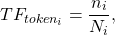

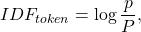

где n_i — сколько раз встречается токен в i-ом документе,  
N_i — общее количество токенов в i-ом документе,   
p — количество документов, в которых встречается токен,   
P — общее количеств документов.   
В конечном счете, TF-IDF – это произведение TF на IDF

 В TF-IDF редкие слова и слова, которые встречаются во всех документах, несут мало информации. 

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [112]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лемматизированный текст'])

CPU times: total: 18.1 s
Wall time: 18.3 s


In [113]:
tfidf_matrix.shape

(1186, 10000)

In [114]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['about', 'academy', 'access', 'accessibility', 'action', 'actions',
       'active', 'add', 'address', 'adobe', 'advanced', 'after', 'agency',
       'agent', 'agile', 'ai', 'aic', 'airbnb', 'al', 'all', 'alpha',
       'alt', 'am', 'amazon', 'an', 'analysis', 'analytics', 'and',
       'android', 'android приложение', 'android разработка',
       'android разработчик', 'angular', 'any', 'apache', 'api', 'app',
       'app store', 'append', 'apple', 'application', 'apps', 'ar',
       'architecture', 'arduino', 'are', 'args', 'arm', 'array', 'art',
       'as', 'async', 'at', 'audio', 'auto', 'avito', 'awards', 'awesome',
       'aws', 'azure', 'back', 'backend', 'background', 'badoo', 'bar',
       'base', 'based', 'bash', 'basic', 'be', 'before', 'begin', 'best',
       'beta', 'beyond', 'big', 'big data', 'bin', 'black', 'block',
       'blog', 'blue', 'bluetooth', 'body', 'bold', 'boolean', 'boot',
       'bootstrap', 'bot', 'box', 'brain', 'break', 'buffer', 'build',
      

In [121]:
tfidf_vectorizer.get_feature_names_out()[1169]

'аутентификация'

In [122]:
tfidf_vectorizer.get_feature_names_out()[8060]

'система'

In [120]:
print(tfidf_matrix)

  (0, 6787)	0.005808561254331904
  (0, 9518)	0.004288662964129822
  (0, 1106)	0.007345855212620635
  (0, 7788)	0.01073758633880357
  (0, 4678)	0.004656365208309161
  (0, 1169)	0.7399506728376161
  (0, 3741)	0.011731041810413347
  (0, 1046)	0.019219497995782233
  (0, 2536)	0.006730370743325809
  (0, 7391)	0.00417784975885983
  (0, 7036)	0.006817915026217172
  (0, 4083)	0.008903529469743422
  (0, 8619)	0.007187167900796494
  (0, 7547)	0.003843947685046064
  (0, 7324)	0.020831779379304437
  (0, 8318)	0.023660718291191516
  (0, 8060)	0.14032765909149011
  (0, 9276)	0.052608385435191585
  (0, 2686)	0.07040853751088537
  (0, 6734)	0.01112459280197203
  (0, 6347)	0.029939685171599156
  (0, 5423)	0.019432798889946656
  (0, 3449)	0.0422834245355067
  (0, 1663)	0.008714180532292708
  (0, 6536)	0.006985637049198506
  :	:
  (1185, 7429)	0.054438493233272545
  (1185, 7327)	0.027219246616636272
  (1185, 6676)	0.02853758086391594
  (1185, 7021)	0.05635132214630377
  (1185, 4005)	0.05503817145310926
 

### Кластеризация